<a ><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Logo_INSA_Lyon_%282014%29.svg/langfr-2560px-Logo_INSA_Lyon_%282014%29.svg.png"  width="200" align="left"> </a>
<div style="text-align: right"> <h3><span style="color:gray"> Projet de recherche </span> </h3> </div>

<br>
<br>
<br>


<h1><center>Data Analysis</center></h1>
<h2><center> <span style="font-weight:normal"><font color='#e42618'> Creating Targets and Features based on analyst reports and market data</font>  </span></center></h2>


<h3><center><font color='gray'>JONAS GOTTAL</font></center></h3>





<h4>Project scope</h4>

- Obtaining financial research containing both a report in natural language and a quantifiable prediction on the underlying asset
- Building predictive models that e.g., accurately detect semantic causality
- Evaluation whether there is a correlation between causal formulations and a higher accuracy from an analyst
<br>

---
---

## ToDo Saturday
### Prio 3
- Also include the other columns for predictions and correlations: uncertainty, star rating, ...

### Prio 4 
- Create a Classifier based on Texts (Bull/Bear/Analyst Note) 

## TBD
### Prio 5
- Write Report and detailed data description

### Prio 6
- Run Scraper and add data

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="text-decoration:none; margin-top: 30px; background-color:#F2F2F2; border-color:#720006">
    <span style="color:#720006">
    <ol>
        <li><a href="#1"> <span style="color:#720006;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Design of meaningful Targets</span> </a></li>
       <li><a href="#5"> <span style="color:#720006;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Exploratory Analysis: detection of Features</span> </a></li> 
       <ol>
       <li><a href="#6"> <span style="color:#720006;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Visualization of Text</span> </a></li>
       <li><a href="#7"> <span style="color:#720006;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Absence and presence of certain words and styles (Active/Passive)</span> </a></li>
        <li><a href="#8"> <span style="color:#720006;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Large Language Models: Sentiment, Causality and more</span> </a></li>
       </ol>
       <li><a href="#9"> <span style="color:#720006;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Preliminary Conclusion</span> </a></li>
    </ol>
    </span>
</div>

#### Requirements
- ```Python 3.9.18``` (conda env)
- ```pip freeze > requirements.txt```
- ```conda env export > environment.yml```

# Design of meaningful Targets <a id="1"></a>

### Load Data

In [30]:
import json
import pandas as pd
import numpy as np

# get date as datetime
from datetime import datetime

# Load the data from the JSON file
with open('Data/30d_data/all_data.json') as f:
    all_data_30 = json.load(f)

with open('Data/60d_data/all_data.json') as f:
    all_data_60 = json.load(f)

# Convert each item in the dictionary back into a DataFrame
all_data_30_df = {key: pd.read_json(value, orient='columns') for key, value in all_data_30.items()}

all_data_60_df = {key: pd.read_json(value, orient='columns') for key, value in all_data_60.items()}

df = pd.read_csv('Data/final_data.csv', index_col=0)


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/1149105659.py:16: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  all_data_30_df = {key: pd.read_json(value, orient='columns') for key, value in all_data_30.items()}
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/1149105659.py:16: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  all_data_30_df = {key: pd.read_json(value, orient='columns') for key, value in all_data_30.items()}
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/1149105659.py:16: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  all_data_30_df = {key: pd.read_json(va

In [31]:
#test 
all_data_60_df['VMUK.L']

Open        High         Low       Close   Adj Close  \
2023-09-25  165.250000  169.100006  165.250000  167.800003  167.800003   
2023-09-26  165.000000  169.449997  165.000000  168.300003  168.300003   
2023-09-27  164.850006  169.899994  164.850006  167.350006  167.350006   
2023-09-28  165.449997  168.000000  164.949997  166.199997  166.199997   
2023-09-29  170.550003  170.550003  166.649994  168.350006  168.350006   
...                ...         ...         ...         ...         ...   
2024-01-08  157.149994  159.399994  155.149994  158.899994  158.899994   
2024-01-09  160.000000  160.000000  156.300003  156.750000  156.750000   
2024-01-10  153.500000  157.649994  153.500000  155.800003  155.800003   
2024-01-11  153.449997  157.000000  152.149994  152.149994  152.149994   
2024-01-12  155.399994  157.149994  154.050003  154.050003  154.050003   

             Volume  
2023-09-25  1864101  
2023-09-26  1284724  
2023-09-27   990305  
2023-09-28  1221103  
2023-09-29  1632643  
...             ...  
2024-01-08  1784714  
2024-01-09  1087931  
2024-01-10  1456553  
2024-01-11  1412581  
2024-01-12  2240898  

[77 rows x 6 columns]

### Get moving average before and after

In [32]:
# for adjusted close in all_data_df[symbol], calculate the moving average from the start to the date (df["PriceDate"][0]) and from that date to the end
# and save in df["30dAvgPrice"][0]

df["30dAvgPriceBefore"] = np.nan
df["30dAvgPriceAfter"] = np.nan
df["60dAvgPriceBefore"] = np.nan
df["60dAvgPriceAfter"] = np.nan

for i in range(len(df)):
    symbol = df["FinalTickerSymbol"][i]
    date = df["PriceDate"][i]
    # turn date into datetime
    date = datetime.strptime(date, '%d/%m/%Y')
    date = date.strftime('%Y-%m-%d')
    try:
        df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
        df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
        df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
        df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
    except:
        pass
    # print progress
    print(f"{i+1}/{len(df)}")

1/1626
2/1626
3/1626
4/1626
5/1626
6/1626
7/1626
8/1626
9/1626
10/1626
11/1626
12/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

13/1626
14/1626
15/1626
16/1626
17/1626
18/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

19/1626
20/1626
21/1626
22/1626
23/1626
24/1626
25/1626
26/1626
27/1626
28/1626
29/1626
30/1626
31/1626
32/1626
33/1626
34/1626
35/1626
36/1626
37/1626
38/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

39/1626
40/1626
41/1626
42/1626
43/1626
44/1626
45/1626
46/1626
47/1626
48/1626
49/1626
50/1626
51/1626
52/1626
53/1626
54/1626
55/1626
56/1626
57/1626
58/1626
59/1626
60/1626
61/1626
62/1626
63/1626
64/1626
65/1626
66/1626
67/1626
68/1626
69/1626
70/1626
71/1626
72/1626
73/1626
74/1626
75/1626
76/1626
77/1626
78/1626
79/1626
80/1626
81/1626
82/1626
83/1626
84/1626
85/1626
86/1626
87/1626
88/1626
89/1626
90/1626
91/1626
92/1626
93/1626
94/1626
95/1626
96/1626
97/1626
98/1626
99/1626
100/1626
101/1626
102/1626
103/1626
104/1626
105/1626
106/1626
107/1626
108/1626
109/1626
110/1626
111/1626
112/1626
113/1626
114/1626
115/1626
116/1626
117/1626
118/1626
119/1626
120/1626
121/1626
122/1626
123/1626
124/1626
125/1626
126/1626
127/1626
128/1626
129/1626
130/1626
131/1626
132/1626
133/1626
134/1626
135/1626
136/1626
137/1626
138/1626
139/1626
140/1626
141/1626
142/1626
143/1626
144/1626
145/1626
146/1626
147/1626
148/1626
149/1626
150/1626
151/1626
152/1626
153/1626
154/1626
155/1626
156/1626

/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

220/1626
221/1626
222/1626
223/1626
224/1626
225/1626
226/1626
227/1626
228/1626
229/1626
230/1626
231/1626
232/1626
233/1626
234/1626
235/1626
236/1626
237/1626
238/1626
239/1626
240/1626
241/1626
242/1626
243/1626
244/1626
245/1626
246/1626
247/1626
248/1626
249/1626
250/1626
251/1626
252/1626
253/1626
254/1626
255/1626
256/1626
257/1626
258/1626
259/1626
260/1626
261/1626
262/1626
263/1626
264/1626
265/1626
266/1626
267/1626
268/1626
269/1626
270/1626
271/1626
272/1626
273/1626
274/1626
275/1626
276/1626
277/1626
278/1626
279/1626
280/1626
281/1626
282/1626
283/1626
284/1626
285/1626
286/1626
287/1626
288/1626
289/1626
290/1626
291/1626
292/1626
293/1626
294/1626
295/1626
296/1626
297/1626
298/1626
299/1626
300/1626
301/1626
302/1626
303/1626
304/1626
305/1626
306/1626
307/1626
308/1626
309/1626
310/1626
311/1626
312/1626
313/1626
314/1626
315/1626
316/1626
317/1626
318/1626
319/1626
320/1626
321/1626
322/1626
323/1626
324/1626
325/1626
326/1626
327/1626
328/1626
329/1626
330/1626
3

/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

531/1626
532/1626
533/1626
534/1626
535/1626
536/1626
537/1626
538/1626
539/1626
540/1626
541/1626
542/1626
543/1626
544/1626
545/1626
546/1626
547/1626
548/1626
549/1626
550/1626
551/1626
552/1626
553/1626
554/1626
555/1626
556/1626
557/1626
558/1626
559/1626
560/1626
561/1626
562/1626
563/1626
564/1626
565/1626
566/1626
567/1626
568/1626
569/1626
570/1626
571/1626
572/1626
573/1626
574/1626
575/1626
576/1626
577/1626
578/1626
579/1626
580/1626
581/1626
582/1626
583/1626
584/1626
585/1626
586/1626
587/1626
588/1626
589/1626
590/1626
591/1626
592/1626
593/1626
594/1626
595/1626
596/1626
597/1626
598/1626
599/1626
600/1626
601/1626
602/1626
603/1626
604/1626
605/1626
606/1626
607/1626
608/1626
609/1626
610/1626
611/1626
612/1626
613/1626
614/1626
615/1626
616/1626
617/1626
618/1626
619/1626
620/1626
621/1626
622/1626
623/1626
624/1626
625/1626
626/1626
627/1626
628/1626
629/1626
630/1626
631/1626
632/1626
633/1626
634/1626
635/1626
636/1626
637/1626
638/1626
639/1626
640/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

641/1626
642/1626
643/1626
644/1626
645/1626
646/1626
647/1626
648/1626
649/1626
650/1626
651/1626
652/1626
653/1626
654/1626
655/1626
656/1626
657/1626
658/1626
659/1626
660/1626
661/1626
662/1626
663/1626
664/1626
665/1626
666/1626
667/1626
668/1626
669/1626
670/1626
671/1626
672/1626
673/1626
674/1626
675/1626
676/1626
677/1626
678/1626
679/1626
680/1626
681/1626
682/1626
683/1626
684/1626
685/1626
686/1626
687/1626
688/1626
689/1626
690/1626
691/1626
692/1626
693/1626
694/1626
695/1626
696/1626
697/1626
698/1626
699/1626
700/1626
701/1626
702/1626
703/1626
704/1626
705/1626
706/1626
707/1626
708/1626
709/1626
710/1626
711/1626
712/1626
713/1626
714/1626
715/1626
716/1626
717/1626
718/1626
719/1626
720/1626
721/1626
722/1626
723/1626
724/1626
725/1626
726/1626
727/1626
728/1626
729/1626
730/1626
731/1626
732/1626
733/1626
734/1626
735/1626
736/1626
737/1626
738/1626
739/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

740/1626
741/1626
742/1626
743/1626
744/1626
745/1626
746/1626
747/1626
748/1626
749/1626
750/1626
751/1626
752/1626
753/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

754/1626
755/1626
756/1626
757/1626
758/1626
759/1626
760/1626
761/1626
762/1626
763/1626
764/1626
765/1626
766/1626
767/1626
768/1626
769/1626
770/1626
771/1626
772/1626
773/1626
774/1626
775/1626
776/1626
777/1626
778/1626
779/1626
780/1626
781/1626
782/1626
783/1626
784/1626
785/1626
786/1626
787/1626
788/1626
789/1626
790/1626
791/1626
792/1626
793/1626
794/1626
795/1626
796/1626
797/1626
798/1626
799/1626
800/1626
801/1626
802/1626
803/1626
804/1626
805/1626
806/1626
807/1626
808/1626
809/1626
810/1626
811/1626
812/1626
813/1626
814/1626
815/1626
816/1626
817/1626
818/1626
819/1626
820/1626
821/1626
822/1626
823/1626
824/1626
825/1626
826/1626
827/1626
828/1626
829/1626
830/1626
831/1626
832/1626
833/1626
834/1626
835/1626
836/1626
837/1626
838/1626
839/1626
840/1626
841/1626
842/1626
843/1626
844/1626
845/1626
846/1626
847/1626
848/1626
849/1626
850/1626
851/1626
852/1626
853/1626
854/1626
855/1626
856/1626
857/1626
858/1626
859/1626
860/1626
861/1626
862/1626
863/1626
864/1626
8

/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

875/1626
876/1626
877/1626
878/1626
879/1626
880/1626
881/1626
882/1626
883/1626
884/1626
885/1626
886/1626
887/1626
888/1626
889/1626
890/1626
891/1626
892/1626
893/1626
894/1626
895/1626
896/1626
897/1626
898/1626
899/1626
900/1626
901/1626
902/1626
903/1626
904/1626
905/1626
906/1626
907/1626
908/1626
909/1626
910/1626
911/1626
912/1626
913/1626
914/1626
915/1626
916/1626
917/1626
918/1626
919/1626
920/1626
921/1626
922/1626
923/1626
924/1626
925/1626
926/1626
927/1626
928/1626
929/1626
930/1626
931/1626
932/1626
933/1626
934/1626
935/1626
936/1626
937/1626
938/1626
939/1626
940/1626
941/1626
942/1626
943/1626
944/1626
945/1626
946/1626
947/1626
948/1626
949/1626
950/1626
951/1626
952/1626
953/1626
954/1626
955/1626
956/1626
957/1626
958/1626
959/1626
960/1626
961/1626
962/1626
963/1626
964/1626
965/1626
966/1626
967/1626
968/1626
969/1626
970/1626
971/1626
972/1626
973/1626
974/1626
975/1626
976/1626
977/1626
978/1626
979/1626
980/1626
981/1626
982/1626
983/1626
984/1626
985/1626
9

/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1154/1626
1155/1626
1156/1626
1157/1626
1158/1626
1159/1626
1160/1626
1161/1626
1162/1626
1163/1626
1164/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1165/1626
1166/1626
1167/1626
1168/1626
1169/1626
1170/1626
1171/1626
1172/1626
1173/1626
1174/1626
1175/1626
1176/1626
1177/1626
1178/1626
1179/1626
1180/1626
1181/1626
1182/1626
1183/1626
1184/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1185/1626
1186/1626
1187/1626
1188/1626
1189/1626
1190/1626
1191/1626
1192/1626
1193/1626
1194/1626
1195/1626
1196/1626
1197/1626
1198/1626
1199/1626
1200/1626
1201/1626
1202/1626
1203/1626
1204/1626
1205/1626
1206/1626
1207/1626
1208/1626
1209/1626
1210/1626
1211/1626
1212/1626
1213/1626
1214/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1215/1626
1216/1626
1217/1626
1218/1626
1219/1626
1220/1626
1221/1626
1222/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1223/1626
1224/1626
1225/1626
1226/1626
1227/1626
1228/1626
1229/1626
1230/1626
1231/1626
1232/1626
1233/1626
1234/1626
1235/1626
1236/1626
1237/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1238/1626
1239/1626
1240/1626
1241/1626
1242/1626
1243/1626
1244/1626
1245/1626
1246/1626
1247/1626
1248/1626
1249/1626
1250/1626
1251/1626
1252/1626
1253/1626
1254/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1255/1626
1256/1626
1257/1626
1258/1626
1259/1626
1260/1626
1261/1626
1262/1626
1263/1626
1264/1626
1265/1626
1266/1626
1267/1626
1268/1626
1269/1626
1270/1626
1271/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1272/1626
1273/1626
1274/1626
1275/1626
1276/1626
1277/1626
1278/1626
1279/1626
1280/1626
1281/1626
1282/1626
1283/1626
1284/1626
1285/1626
1286/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1287/1626
1288/1626
1289/1626
1290/1626
1291/1626
1292/1626
1293/1626
1294/1626
1295/1626
1296/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1297/1626
1298/1626
1299/1626
1300/1626
1301/1626
1302/1626
1303/1626
1304/1626
1305/1626
1306/1626
1307/1626
1308/1626
1309/1626
1310/1626
1311/1626
1312/1626
1313/1626
1314/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1315/1626
1316/1626
1317/1626
1318/1626
1319/1626
1320/1626
1321/1626
1322/1626
1323/1626
1324/1626
1325/1626
1326/1626
1327/1626
1328/1626
1329/1626
1330/1626
1331/1626
1332/1626
1333/1626
1334/1626
1335/1626
1336/1626
1337/1626
1338/1626
1339/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1340/1626
1341/1626
1342/1626
1343/1626
1344/1626
1345/1626
1346/1626
1347/1626
1348/1626
1349/1626
1350/1626
1351/1626
1352/1626
1353/1626
1354/1626
1355/1626
1356/1626
1357/1626
1358/1626
1359/1626
1360/1626
1361/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1362/1626
1363/1626
1364/1626
1365/1626
1366/1626
1367/1626
1368/1626
1369/1626
1370/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1371/1626
1372/1626
1373/1626
1374/1626
1375/1626
1376/1626
1377/1626
1378/1626
1379/1626
1380/1626
1381/1626
1382/1626
1383/1626
1384/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1385/1626
1386/1626
1387/1626
1388/1626
1389/1626
1390/1626
1391/1626
1392/1626
1393/1626
1394/1626
1395/1626
1396/1626
1397/1626
1398/1626
1399/1626
1400/1626
1401/1626
1402/1626
1403/1626
1404/1626
1405/1626
1406/1626
1407/1626
1408/1626
1409/1626
1410/1626
1411/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1412/1626
1413/1626
1414/1626
1415/1626
1416/1626
1417/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1418/1626
1419/1626
1420/1626
1421/1626
1422/1626
1423/1626
1424/1626
1425/1626
1426/1626
1427/1626
1428/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1429/1626
1430/1626
1431/1626
1432/1626
1433/1626
1434/1626
1435/1626
1436/1626
1437/1626
1438/1626
1439/1626
1440/1626
1441/1626
1442/1626
1443/1626
1444/1626
1445/1626
1446/1626
1447/1626
1448/1626
1449/1626
1450/1626
1451/1626
1452/1626
1453/1626
1454/1626
1455/1626
1456/1626
1457/1626
1458/1626
1459/1626
1460/1626
1461/1626
1462/1626
1463/1626
1464/1626
1465/1626
1466/1626
1467/1626
1468/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1469/1626
1470/1626
1471/1626
1472/1626
1473/1626
1474/1626
1475/1626
1476/1626
1477/1626
1478/1626
1479/1626
1480/1626
1481/1626
1482/1626
1483/1626
1484/1626
1485/1626
1486/1626
1487/1626
1488/1626
1489/1626
1490/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1491/1626
1492/1626
1493/1626
1494/1626
1495/1626
1496/1626
1497/1626
1498/1626
1499/1626
1500/1626
1501/1626
1502/1626
1503/1626
1504/1626
1505/1626
1506/1626
1507/1626
1508/1626
1509/1626
1510/1626
1511/1626
1512/1626
1513/1626
1514/1626
1515/1626
1516/1626
1517/1626
1518/1626
1519/1626
1520/1626
1521/1626
1522/1626
1523/1626
1524/1626
1525/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1526/1626
1527/1626
1528/1626
1529/1626
1530/1626
1531/1626
1532/1626
1533/1626
1534/1626
1535/1626
1536/1626
1537/1626
1538/1626
1539/1626
1540/1626
1541/1626
1542/1626
1543/1626
1544/1626
1545/1626
1546/1626
1547/1626
1548/1626
1549/1626
1550/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1551/1626
1552/1626
1553/1626
1554/1626
1555/1626
1556/1626
1557/1626
1558/1626
1559/1626
1560/1626
1561/1626
1562/1626
1563/1626
1564/1626
1565/1626
1566/1626
1567/1626
1568/1626
1569/1626
1570/1626
1571/1626
1572/1626
1573/1626
1574/1626
1575/1626
1576/1626
1577/1626
1578/1626
1579/1626
1580/1626
1581/1626
1582/1626
1583/1626
1584/1626
1585/1626
1586/1626
1587/1626
1588/1626
1589/1626
1590/1626
1591/1626
1592/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1593/1626
1594/1626
1595/1626
1596/1626
1597/1626
1598/1626
1599/1626
1600/1626
1601/1626
1602/1626
1603/1626
1604/1626
1605/1626
1606/1626
1607/1626
1608/1626
1609/1626
1610/1626
1611/1626
1612/1626
1613/1626
1614/1626
1615/1626
1616/1626
1617/1626
1618/1626
1619/1626
1620/1626
1621/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

1622/1626
1623/1626
1624/1626
1625/1626
1626/1626


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/71016409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [33]:
df

ParseDate                                              Title  \
0     24/11/2023  Virgin Money Meeting Short-Term Targets but Me...   
1     24/11/2023  Virgin Money Meeting Short-Term Targets but Me...   
2     24/11/2023  Qube's Good Momentum Likely to Carry Into Fisc...   
3     24/11/2023  Stabilization of Political Risk in Spain Is Po...   
4     24/11/2023  Sage Has Reached an Inflection Point in Its Cl...   
...          ...                                                ...   
1621  25/11/2023  Minimal Changes To Our Fair Value After Fiscal...   
1622  25/11/2023  Xiabuxiabu's Value-Oriented Model Should Fare ...   
1623  25/11/2023  NextDC's Australia Wide Data Center Network Ex...   
1624  25/11/2023     EVT on Track To Return to Prepandemic Earnings   
1625  25/11/2023  Cloud Music Will Likely See Long-Run Subscribe...   

                                            CompanyName TickerSymbol  Rating  \
0                                   Virgin Money UK PLC         VMUK       4   
1                                   Virgin Money UK PLC          VUK       4   
2                                     Qube Holdings Ltd          QUB       4   
3                                             Endesa SA          ELE       4   
4                                  Sage Group (The) PLC          SGE       1   
...                                                 ...          ...     ...   
1621                          The Toronto-Dominion Bank           TD       4   
1622  Xiabuxiabu Catering Management (China) Hldgs C...        00520       4   
1623                                         Nextdc Ltd          NXT       3   
1624                                            EVT Ltd          EVT       4   
1625                                    Cloud Music Inc        09899       4   

      ReportDate      AuthorName    Price Currency   PriceDate  ...  \
0     24/11/2023     Nathan Zaia   146.75      GBP  23/11/2023  ...   
1     24/11/2023     Nathan Zaia     2.78      AUD  24/11/2023  ...   
2     24/11/2023   Adrian Atkins     2.93      AUD  24/11/2023  ...   
3     23/11/2023  Tancrede Fulop    18.84      EUR  24/11/2023  ...   
4     23/11/2023       Rob Hales  1130.50      GBP  23/11/2023  ...   
...          ...             ...      ...      ...         ...  ...   
1621         NaN    Eric Compton    83.15      CAD  23/11/2023  ...   
1622  28/08/2023         Ivan Su     3.25      HKD  24/11/2023  ...   
1623  28/08/2023       Dan Baker    12.92      AUD  24/11/2023  ...   
1624  28/08/2023       Brian Han    10.82      AUD  24/11/2023  ...   
1625  28/08/2023         Ivan Su    88.55      HKD  24/11/2023  ...   

         MarketCap Exchange     Volume TickerCurrency  TickerPrice IsClose  \
0     1.932661e+09      LSE    45564.0            GBp   157.000000    True   
1     3.709752e+09      ASX  2057263.0            AUD     2.960000    True   
2     5.229462e+09      ASX  2520549.0            AUD     2.930000    True   
3     2.130355e+10      IOB     5925.0            EUR    18.764191    True   
4     1.173311e+10      LSE   262362.0            GBp  1130.000000    True   
...            ...      ...        ...            ...          ...     ...   
1621  1.466779e+11      TOR  4963474.0            CAD    83.360001    True   
1622           NaN      NaN        NaN            NaN     3.290000    True   
1623  6.918949e+09      ASX  1956904.0            AUD    13.070000    True   
1624  1.720115e+09      ASX    52356.0            AUD    10.830000    True   
1625  1.882628e+10      HKG    67205.0            HKD    85.199997    True   

     30dAvgPriceBefore 30dAvgPriceAfter 60dAvgPriceBefore 60dAvgPriceAfter  
0           157.710417       154.075000        159.023864       156.066176  
1             2.994167         2.940476          3.028889         2.978485  
2             2.840000         3.059524          2.814889         3.124242  
3            18.198966        18.992456         18.295563        18.926560  
4           980.52

In [34]:
# only use data for "isClose" == True
print(len(df))
df = df[df["IsClose"] == True]
# then reset index
df = df.reset_index(drop=True)
print(len(df))

1626
1586


### Stock Trend before and after release of report

We check whether the stock is growing ```(1)```, constant ```(0)``` or falling ```(-1)``` for two points of time: at release of report and 30d/60d after. We also design a binary variable in the same way whether the analyst estimates the stock to grow, fall or move sideways. This enables us to design our desired Targets and also obtain some basic metrics:
- Trend of predictions
- Accuracy of predictions 
- And whether the accuracy is dependent on the prediction itself -> sub categories



In [36]:
#check whether two numbers are nearly the same
def isclose(a, b, rel_tol=3e-02, abs_tol=0.0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

# Thresh
# isclose(1.05, 1.00)

# we loop over i elements in the df and check whether the price is within 5% of the price in the Price column
trend_list = []
value = False
for i in range(len(df)):
    value = isclose(df["30dAvgPriceBefore"][i], df["TickerPrice"][i])
    if value == True:
        trend_list.append(0)
    else:
        if df["TickerPrice"][i] > df["30dAvgPriceBefore"][i]:
            trend_list.append(1)
        else:
            trend_list.append(-1)
    # print progress
    print(f"{i+1}/{len(df)}")

df["30dTrend"] = trend_list

trend_list = []
value = False
for i in range(len(df)):
    value = isclose(df["60dAvgPriceBefore"][i], df["TickerPrice"][i])
    if value == True:
        trend_list.append(0)
    else:
        if df["TickerPrice"][i] > df["60dAvgPriceBefore"][i]:
            trend_list.append(1)
        else:
            trend_list.append(-1)
    # print progress
    print(f"{i+1}/{len(df)}")

df["60dTrend"] = trend_list

# we loop over i elements in the df and check whether the price is within 5% of the price in the Price column
trend_list = []
value = False
for i in range(len(df)):
    value = isclose(df["30dAvgPriceAfter"][i], df["TickerPrice"][i])
    if value == True:
        trend_list.append(0)
    else:
        if df["TickerPrice"][i] < df["30dAvgPriceAfter"][i]:
            trend_list.append(1)
        else:
            trend_list.append(-1)
    # print progress
    print(f"{i+1}/{len(df)}")

df["Actual30d"] = trend_list

trend_list = []
value = False
for i in range(len(df)):
    value = isclose(df["60dAvgPriceAfter"][i], df["TickerPrice"][i])
    if value == True:
        trend_list.append(0)
    else:
        if df["TickerPrice"][i] < df["60dAvgPriceAfter"][i]:
            trend_list.append(1)
        else:
            trend_list.append(-1)
    # print progress
    print(f"{i+1}/{len(df)}")

df["Actual60d"] = trend_list


#Update the function to include a higher tolerance
#the prediction is for a longer time horizon, so we can be less precise
def isclose(a, b, rel_tol=8e-02, abs_tol=0.0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

# we loop over i elements in the df and check whether the price is within 5% of the price in the Price column
prediction_list = []
value = False
for i in range(len(df)):
    value = isclose(df["FairPrice"][i], df["Price"][i])
    if value == True:
        prediction_list.append(0)
    else:
        if df["FairPrice"][i] > df["Price"][i]:
            prediction_list.append(1)
        else:
            prediction_list.append(-1)
    # print progress
    print(f"{i+1}/{len(df)}")

df["Prediction"] = prediction_list

1/1586
2/1586
3/1586
4/1586
5/1586
6/1586
7/1586
8/1586
9/1586
10/1586
11/1586
12/1586
13/1586
14/1586
15/1586
16/1586
17/1586
18/1586
19/1586
20/1586
21/1586
22/1586
23/1586
24/1586
25/1586
26/1586
27/1586
28/1586
29/1586
30/1586
31/1586
32/1586
33/1586
34/1586
35/1586
36/1586
37/1586
38/1586
39/1586
40/1586
41/1586
42/1586
43/1586
44/1586
45/1586
46/1586
47/1586
48/1586
49/1586
50/1586
51/1586
52/1586
53/1586
54/1586
55/1586
56/1586
57/1586
58/1586
59/1586
60/1586
61/1586
62/1586
63/1586
64/1586
65/1586
66/1586
67/1586
68/1586
69/1586
70/1586
71/1586
72/1586
73/1586
74/1586
75/1586
76/1586
77/1586
78/1586
79/1586
80/1586
81/1586
82/1586
83/1586
84/1586
85/1586
86/1586
87/1586
88/1586
89/1586
90/1586
91/1586
92/1586
93/1586
94/1586
95/1586
96/1586
97/1586
98/1586
99/1586
100/1586
101/1586
102/1586
103/1586
104/1586
105/1586
106/1586
107/1586
108/1586
109/1586
110/1586
111/1586
112/1586
113/1586
114/1586
115/1586
116/1586
117/1586
118/1586
119/1586
120/1586
121/1586
122/1586
123/1586
1

In [37]:
# new column for whether the prediction was correct after 30 and 60 days
# is True if the prediction and actual30 are the same
df["30Correct"] = df["Prediction"] == df["Actual30d"]
df["60Correct"] = df["Prediction"] == df["Actual60d"]

# the same if the prediction just mirrors the trend
#is true if the prediction and the trend and the actual are all the same
df["30CorrectTrend"] = (df["Prediction"] == df["30dTrend"]) & (df["Prediction"] == df["Actual30d"])
df["60CorrectTrend"] = (df["Prediction"] == df["60dTrend"]) & (df["Prediction"] == df["Actual60d"])

df["30CorrectNoTrend"] = (df["Prediction"] != df["30dTrend"]) & (df["Prediction"] == df["Actual30d"])
df["60CorrectNoTrend"] = (df["Prediction"] != df["60dTrend"]) & (df["Prediction"] == df["Actual60d"])

# column whether a change is predicted
df["30Change"] = df["Prediction"] != df["30dTrend"]
df["60Change"] = df["Prediction"] != df["60dTrend"]

df["StableTrend"] = df["30dTrend"] == df["60dTrend"]



In [38]:
df

ParseDate                                              Title  \
0     24/11/2023  Virgin Money Meeting Short-Term Targets but Me...   
1     24/11/2023  Virgin Money Meeting Short-Term Targets but Me...   
2     24/11/2023  Qube's Good Momentum Likely to Carry Into Fisc...   
3     24/11/2023  Stabilization of Political Risk in Spain Is Po...   
4     24/11/2023  Sage Has Reached an Inflection Point in Its Cl...   
...          ...                                                ...   
1581  25/11/2023  Minimal Changes To Our Fair Value After Fiscal...   
1582  25/11/2023  Xiabuxiabu's Value-Oriented Model Should Fare ...   
1583  25/11/2023  NextDC's Australia Wide Data Center Network Ex...   
1584  25/11/2023     EVT on Track To Return to Prepandemic Earnings   
1585  25/11/2023  Cloud Music Will Likely See Long-Run Subscribe...   

                                            CompanyName TickerSymbol  Rating  \
0                                   Virgin Money UK PLC         VMUK       4   
1                                   Virgin Money UK PLC          VUK       4   
2                                     Qube Holdings Ltd          QUB       4   
3                                             Endesa SA          ELE       4   
4                                  Sage Group (The) PLC          SGE       1   
...                                                 ...          ...     ...   
1581                          The Toronto-Dominion Bank           TD       4   
1582  Xiabuxiabu Catering Management (China) Hldgs C...        00520       4   
1583                                         Nextdc Ltd          NXT       3   
1584                                            EVT Ltd          EVT       4   
1585                                    Cloud Music Inc        09899       4   

      ReportDate      AuthorName    Price Currency   PriceDate  ...  \
0     24/11/2023     Nathan Zaia   146.75      GBP  23/11/2023  ...   
1     24/11/2023     Nathan Zaia     2.78      AUD  24/11/2023  ...   
2     24/11/2023   Adrian Atkins     2.93      AUD  24/11/2023  ...   
3     23/11/2023  Tancrede Fulop    18.84      EUR  24/11/2023  ...   
4     23/11/2023       Rob Hales  1130.50      GBP  23/11/2023  ...   
...          ...             ...      ...      ...         ...  ...   
1581         NaN    Eric Compton    83.15      CAD  23/11/2023  ...   
1582  28/08/2023         Ivan Su     3.25      HKD  24/11/2023  ...   
1583  28/08/2023       Dan Baker    12.92      AUD  24/11/2023  ...   
1584  28/08/2023       Brian Han    10.82      AUD  24/11/2023  ...   
1585  28/08/2023         Ivan Su    88.55      HKD  24/11/2023  ...   

      Prediction 30Correct 60Correct 30CorrectTrend 60CorrectTrend  \
0              1     False     False          False          False   
1              1     False     False          False          False   
2              1      True      True           True           True   
3              1     False     False          False          False   
4             -1     False     False          False          False   
...          ...       ...       ...            ...            ...   
1581           1     False     False          False          False   
1582           1     False     False          False          False   
1583           0      True      True          False          False   
1584           1      True      True          False          False   
1585           1      True      True          False          False   

     30CorrectNoTrend 60CorrectNoTrend 30Change 60Change StableTrend  
0               False            False     True     True        True  
1               False            False     True     True        True  
2               False            False    False    False        True  
3               False            False    False     True       False  
4               False            False     True     True        True  
...               ...              ...      ...      ...         ...  
15

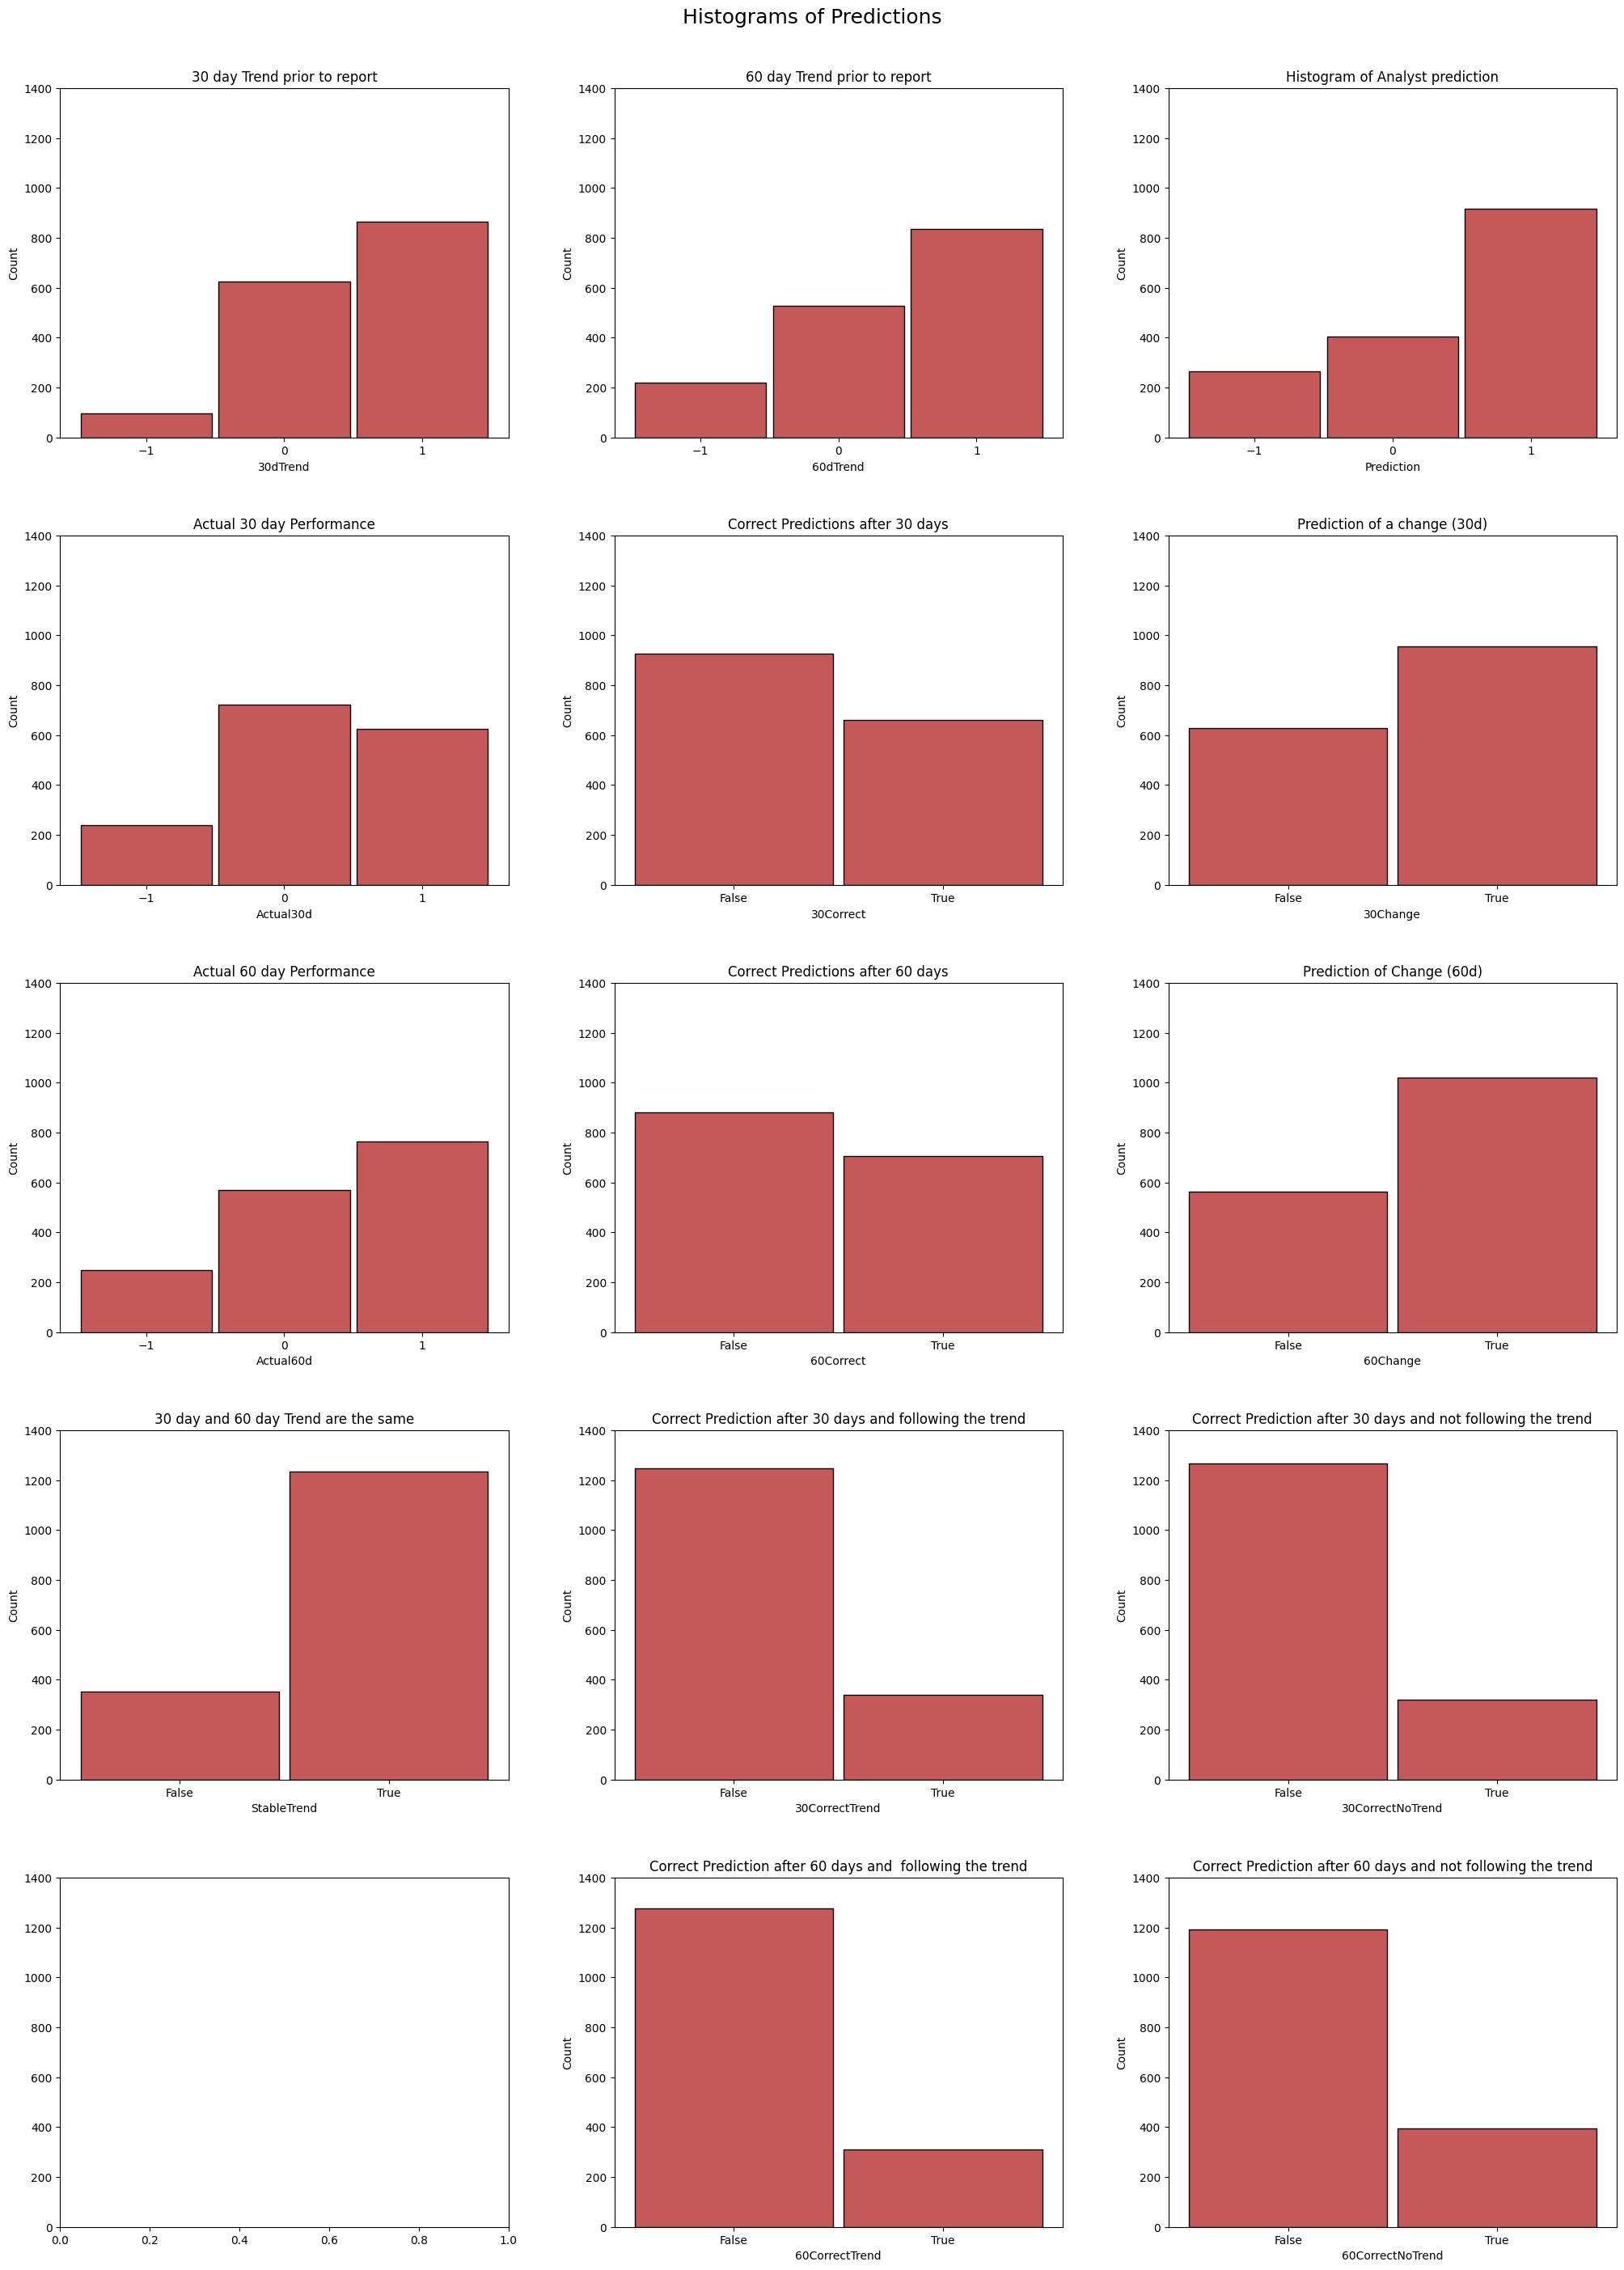

In [39]:
# we visualize the binary data of the columns Trend, Prediction by histograms
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Trend', 'Prediction' are its columns
fig, axs = plt.subplots(5,3, figsize=(21, 29))


sns.histplot(data=df, x='30dTrend', kde=False, ax=axs[0,0], discrete=True, color = "firebrick", shrink=0.95)
axs[0,0].set_title('30 day Trend prior to report')
axs[0,0].set_xticks([-1, 0, 1])

sns.histplot(data=df, x='60dTrend', kde=False, ax=axs[0,1], discrete=True, color = "firebrick", shrink=0.95)
axs[0,1].set_title('60 day Trend prior to report')
axs[0,1].set_xticks([-1, 0, 1])

sns.histplot(data=df, x='Prediction', kde=False, ax=axs[0,2], discrete=True, color = "firebrick", shrink=0.95)
axs[0,2].set_title('Histogram of Analyst prediction')
axs[0,2].set_xticks([-1, 0, 1])


sns.histplot(data=df, x='Actual30d', kde=False, ax=axs[1,0], discrete=True, color = "firebrick", shrink=0.95)
axs[1,0].set_title('Actual 30 day Performance')
axs[1,0].set_xticks([-1, 0, 1])

sns.histplot(data=df, x='30Correct', kde=False, ax=axs[1,1], discrete=True, color = "firebrick", shrink=0.95)
axs[1,1].set_title('Correct Predictions after 30 days')
axs[1,1].set_xticks([False, True])
axs[1,1].set_xticklabels(['False', 'True'])

sns.histplot(data=df, x='30Change', kde=False, ax=axs[1,2], discrete=True, color = "firebrick", shrink=0.95)
axs[1,2].set_title('Prediction of a change (30d)')
axs[1,2].set_xticks([False, True])
axs[1,2].set_xticklabels(['False', 'True'])



sns.histplot(data=df, x='Actual60d', kde=False, ax=axs[2,0], discrete=True, color = "firebrick", shrink=0.95)
axs[2,0].set_title('Actual 60 day Performance')
axs[2,0].set_xticks([-1, 0, 1])

sns.histplot(data=df, x='60Correct', kde=False, ax=axs[2,1], discrete=True, color = "firebrick", shrink=0.95)
axs[2,1].set_title('Correct Predictions after 60 days')
axs[2,1].set_xticks([False, True])
axs[2,1].set_xticklabels(['False', 'True'])


sns.histplot(data=df, x='60Change', kde=False, ax=axs[2,2], discrete=True, color = "firebrick", shrink=0.95)
axs[2,2].set_title('Prediction of Change (60d)')
axs[2,2].set_xticks([False, True])
axs[2,2].set_xticklabels(['False', 'True'])



sns.histplot(data=df, x='StableTrend', kde=False, ax=axs[3,0], discrete=True, color = "firebrick", shrink=0.95)
axs[3,0].set_title('30 day and 60 day Trend are the same')
axs[3,0].set_xticks([False, True])
axs[3,0].set_xticklabels(['False', 'True'])


sns.histplot(data=df, x='30CorrectTrend', kde=False, ax=axs[3,1], discrete=True, color = "firebrick", shrink=0.95)
axs[3,1].set_title('Correct Prediction after 30 days and following the trend')
axs[3,1].set_xticks([False, True])
axs[3,1].set_xticklabels(['False', 'True'])

sns.histplot(data=df, x='30CorrectNoTrend', kde=False, ax=axs[3,2], discrete=True, color = "firebrick", shrink=0.95)
axs[3,2].set_title('Correct Prediction after 30 days and not following the trend')
axs[3,2].set_xticks([False, True])
axs[3,2].set_xticklabels(['False', 'True'])





sns.histplot(data=df, x='60CorrectTrend', kde=False, ax=axs[4,1], discrete=True, color = "firebrick", shrink=0.95)
axs[4,1].set_title('Correct Prediction after 60 days and  following the trend')
axs[4,1].set_xticks([False, True])
axs[4,1].set_xticklabels(['False', 'True'])



sns.histplot(data=df, x='60CorrectNoTrend', kde=False, ax=axs[4,2], discrete=True, color = "firebrick", shrink=0.95)
axs[4,2].set_title('Correct Prediction after 60 days and not following the trend')
axs[4,2].set_xticks([False, True])
axs[4,2].set_xticklabels(['False', 'True'])

# Set the same y-axis limit for all subplots
for row in axs:
    for ax in row:
        ax.set_ylim([0, 1400])  # Change 0 and 1000 to the limits you want

#add title
fig.suptitle('Histograms of Predictions', fontsize=18)
plt.tight_layout(pad=4.0)
#plt.show()
# safe as pdf
plt.savefig('Plots/histograms.pdf')

This shows that the analyst reports have a similar distribution of predictions but they rarely have the right predictions. So we try to improve the accuracy by analysing the text data.

# Exploratory Analysis: detection of Features <a id="5"></a>

We try to find metrics in our text data with correlation with our targets so we can improve our predictive qualities.

## Visualization of Text <a id="6"></a> 
First we try to gain more intuition on the text data through some visualizations.

In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df = pd.read_csv('Data/final_data.csv', index_col=0)


### Word Cloud

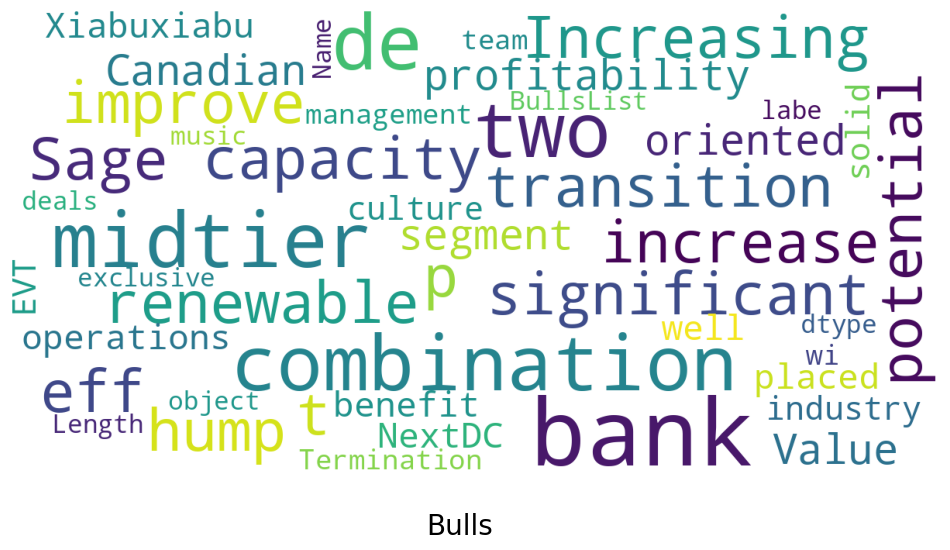

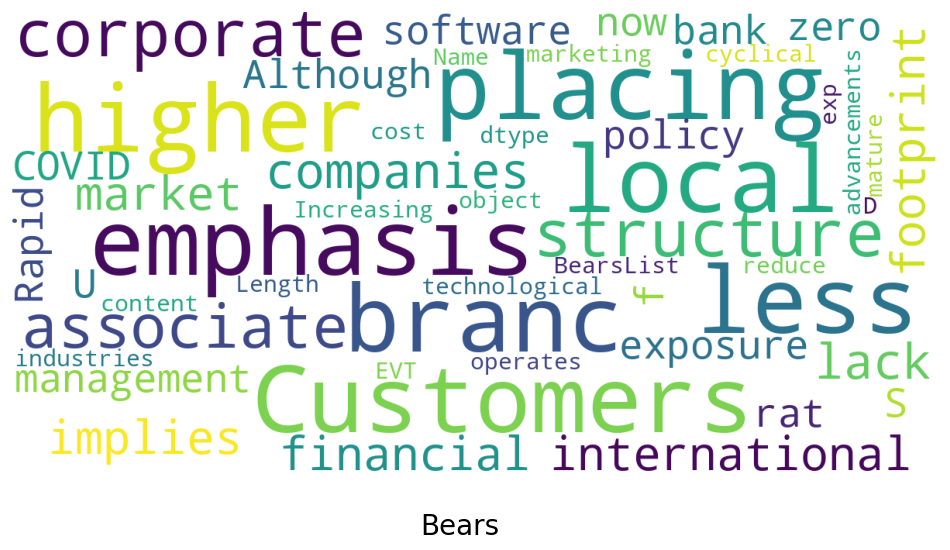

In [3]:

stopwords = set(STOPWORDS)

def show_wordcloud(data, stopwords, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    # also save as pdf
    plt.savefig(f'Plots/{title}_WordCloud.pdf')
    plt.show()

show_wordcloud(df['BullsList'], stopwords, title = "Bulls")
show_wordcloud(df['BearsList'], stopwords, title = "Bears")

### Word Association for Knowledge Graphs

In [11]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [12]:
#combine all the text in one column into one string
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [29]:
# from https://github.com/PrashantSaikia/word-association-graph

def word_association_graph(text_input, title, k=0.4, font_size=32):
    '''
    -The input text is a string of sentences ending in periods. If the text does not have any period, it does not produce a plot.
    -The output is a plot of the nouns in the text connected to the adjectives and verbs as they appear in the text.
    -k is the 'spread factor' - lower the k, lesser the intra-cluster spread,and vice versa.
    -The nodes are sized according to their degree.
    -Nodes are colored red if they are nouns, yellow if they are adjectives, and blue if they are verbs.
    '''
    nouns_in_text = []
    is_noun = lambda pos: pos[:2] == 'NN'
    text = combine_text(text_input)

    for sent in text.split('.')[:-1]:   
        tokenized = nltk.word_tokenize(sent)
        nouns=[word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
        nouns_in_text.append(' '.join([word for word in nouns if not (word=='' or len(word)==1)]))

    nouns_list = []
    
    for sent in nouns_in_text:
        temp = sent.split(' ')
        for word in temp:
            if word not in nouns_list:
                nouns_list.append(word)

    df = pd.DataFrame(np.zeros(shape=(len(nouns_list),2)), columns=['Nouns', 'Verbs & Adjectives'])
    df['Nouns'] = nouns_list

    is_adjective_or_verb = lambda pos: pos[:2]=='JJ' or pos[:2]=='VB'
    for sent in text.split('.'):
        for noun in nouns_list:
            if noun in sent:
                tokenized = nltk.word_tokenize(sent)
                adjectives_or_verbs = [word for (word, pos) in nltk.pos_tag(tokenized) if is_adjective_or_verb(pos)]
                ind = df[df['Nouns']==noun].index[0]
                df['Verbs & Adjectives'][ind]=adjectives_or_verbs

    G = nx.Graph()
    color_map=[]
    for i in range(len(df)):
        G.add_node(df['Nouns'][i], title=df['Nouns'][i], group=1)
        color_map.append('blue')
        for word in df['Verbs & Adjectives'][i]:
            G.add_edges_from([(df['Nouns'][i], word)])
            
    # pos = nx.spring_layout(G, k)
    
    # d = nx.degree(G)
    # node_sizes = []
    # for i in d:
    #     _, value = i
    #     node_sizes.append(value)
    
    # color_list = []
    # for i in G.nodes:
    #     value = nltk.pos_tag([i])[0][1]
    #     if (value=='NN' or value=='NNP' or value=='NNS'):
    #         color_list.append('red')
    #     elif value=='JJ':
    #         color_list.append('yellow')
    #     else:
    #         color_list.append('blue')
    
    nt = Network('750px', '1400px')
    nt.from_nx(G)
    nt.show_buttons(filter_=['physics'])
    nt.show(f'Plots/{title}.html', notebook=False)
    #plt.figure(figsize=(40,40))
    #nx.draw(G, pos, node_size=[(v+1)*200 for v in node_sizes], with_labels=True, node_color=color_list, font_size=font_size)
    #plt.show() 

In [27]:
word_association_graph(df["BearsList"], "Bears")
word_association_graph(df["BullsList"], "Bulls")

/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/683765099.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Verbs & Adjectives'][ind]=adjectives_or_verbs
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_64195/683765099.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['placing', 'less', 'local', 'make', 'difficult', 'raise', 'regional', 'putting']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Verbs & Adjectives'][ind]=adjectives_or_verbs


Plots/Bears.html


<Figure size 3000x2000 with 0 Axes>

## Absence and presence of certain words <a id="7"></a> 

In [40]:
# we first install the library
# pip install spacy
# then we download the english model
# python -m spacy download en_core_web_sm
# we import the library
import spacy
# we load the english model
nlp = spacy.load("en_core_web_sm")

In [42]:
# calculate the number of occurences of negations in the column "BearsList"

# create a list of all the negations
negations = ["not", "no", "n't", "never", "neither", "nor", "none", "nobody", "nothing", "nowhere", "hardly", "scarcely", "barely", "doesn't", "isn't", "wasn't", "shouldn't", "wouldn't", "couldn't", "won't", "can't", "don't", "didn't", "haven't", "hasn't", "hadn't", "aren't", "weren't"]

# create a list of all the negations in the BearsList column
negation_list = []
for i in range(len(df)):
    bear_list = df["BearsList"][i]
    bear_list = bear_list.split()
    item_list = []
    for word in bear_list:
        # make lower case
        word = word.lower()
        if word in negations:
            item_list.append(word)
    #negation_list.append(item_list)
            
    # we calculate the ratio of negations to all words in the list
    negation_list.append(len(item_list)/len(bear_list))
    # print progress
    print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["NegationsBear"] = negation_list

# we do the same for the bull list
# create a list of all the negations in the BullsList column
negation_list = []
for i in range(len(df)):
    bull_list = df["BullsList"][i]
    bull_list = bull_list.split()
    item_list = []
    for word in bull_list:
        # make lower case
        word = word.lower()
        if word in negations:
            item_list.append(word)
    negation_list.append(len(item_list)/len(bull_list))
    # print progress
    print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["NegationsBull"] = negation_list

# we do the same for comparatives   
# create a list of all the comparatives
comparatives = ["more", "most", "less", "least", "fewer", "fewest"]

# create a list of all the comparatives in the BearsList column
comparative_list = []
for i in range(len(df)):
    bear_list = df["BearsList"][i]
    bear_list = bear_list.split()
    item_list = []
    for word in bear_list:
        # make lower case
        word = word.lower()
        if word in comparatives:
            item_list.append(word)
    comparative_list.append(len(item_list)/len(bear_list))
    # print progress
    print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["ComparativesBear"] = comparative_list

# we do the same for the bull list

# create a list of all the comparatives in the BullsList column
comparative_list = []
for i in range(len(df)):
    bull_list = df["BullsList"][i]
    bull_list = bull_list.split()
    item_list = []
    for word in bull_list:
        # make lower case
        word = word.lower()
        if word in comparatives:
            item_list.append(word)
    comparative_list.append(len(item_list)/len(bull_list))
    # print progress
    print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["ComparativesBull"] = comparative_list

# we do the same for superlatives
# create a list of all the superlatives
superlatives = ["best", "worst", "biggest", "largest", "smallest", "greatest", "highest", "lowest", "most", "least", "top", "bottom", "first", "last", "leading", "trailing", "highest", "lowest", "most", "least", "top", "bottom", "first", "last", "leading", "trailing", "highest", "lowest", "most", "least", "top", "bottom", "first", "last", "leading", "trailing", "highest", "lowest", "most", "least", "top", "bottom", "first", "last", "leading", "trailing", "highest", "lowest", "most", "least", "top", "bottom", "first", "last", "leading", "trailing"]

# create a list of all the superlatives in the BearsList column
superlative_list = []
for i in range(len(df)):
    bear_list = df["BearsList"][i]
    bear_list = bear_list.split()
    item_list = []
    for word in bear_list:
        # make lower case
        word = word.lower()
        if word in superlatives:
            item_list.append(word)
    superlative_list.append(len(item_list)/len(bear_list))
    # print progress
    print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["SuperlativesBear"] = superlative_list

# we do the same for the bull list

# create a list of all the superlatives in the BullsList column
superlative_list = []
for i in range(len(df)):
    bull_list = df["BullsList"][i]
    bull_list = bull_list.split()
    item_list = []
    for word in bull_list:
        # make lower case
        word = word.lower()
        if word in superlatives:
            item_list.append(word)
    superlative_list.append(len(item_list)/len(bull_list))
    # print progress
    print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["SuperlativesBull"] = superlative_list


# we create a list of buzzwords for financial reports
buzzwords = ['day', 'margins', 'revenue', 'equity', 'margin', 'quarterly', 'year', 'yearly', 'debt', 'flow', 'cost', 'profit', 'expense', 'month', 'weekly', 'taxes', 'daily', 'earnings', 'week', 'income', 'cash', 'liabilities', 'annual', 'quarter', 'monthly', 'assets', 'costs', 'valuations', 'annually', 'expenses', 'tax', 'loss', 'valuation']

# create a list of all the buzzwords in the BearsList column
buzzword_list = []
for i in range(len(df)):
    bear_list = df["BearsList"][i]
    bear_list = bear_list.split()
    item_list = []
    for word in bear_list:
        # make lower case
        word = word.lower()
        if word in buzzwords:
            item_list.append(word)
    buzzword_list.append(len(item_list)/len(bear_list))
    # print progress
    print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["BuzzwordsBear"] = buzzword_list

# we do the same for the bull list

# create a list of all the buzzwords in the BullsList column
buzzword_list = []
for i in range(len(df)):
    bull_list = df["BullsList"][i]
    bull_list = bull_list.split()
    item_list = []
    for word in bull_list:
        # make lower case
        word = word.lower()
        if word in buzzwords:
            item_list.append(word)
    buzzword_list.append(len(item_list)/len(bull_list))
    # print progress
    print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["BuzzwordsBull"] = buzzword_list

# we create a list of first person pronouns
pronouns = ['i', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours']

# create a list of all the pronouns in the BearsList column
pronoun_list = []
for i in range(len(df)):
    bear_list = df["BearsList"][i]
    bear_list = bear_list.split()
    item_list = []
    for word in bear_list:
        # make lower case
        word = word.lower()
        if word in pronouns:
            item_list.append(word)
    pronoun_list.append(len(item_list)/len(bear_list))
    # print progress
    print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["PronounsBear"] = pronoun_list

# we do the same for the bull list

# create a list of all the pronouns in the BullsList column
pronoun_list = []
for i in range(len(df)):
    bull_list = df["BullsList"][i]
    bull_list = bull_list.split()
    item_list = []
    for word in bull_list:
        # make lower case
        word = word.lower()
        if word in pronouns:
            item_list.append(word)
    pronoun_list.append(len(item_list)/len(bull_list))
    # print progress
    print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["PronounsBull"] = pronoun_list

# we use spacy to determine whether a sentence is in active voice
def is_active(sentence):
    doc = nlp(sentence)
    passive_rule = [tok.dep_ == "auxpass" for tok in doc]

    return not any(passive_rule)


# we create a list of all the sentences in the BearsList column
active_list = []
for i in range(len(df)):
    bear_list = df["BearsList"][i]
    bear_list = bear_list.split(".")
    item_list = []
    for sentence in bear_list:
       
        if is_active(sentence) == True:
            item_list.append(True)
        else:
            item_list.append(False)
    

    active_list.append((item_list.count(True))/len(bear_list))
    # print progress
    print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["ActiveBear"] = active_list

# we do the same for the bull list

# we create a list of all the sentences in the BullsList column
active_list = []
for i in range(len(df)):
    bull_list = df["BullsList"][i]
    bull_list = bull_list.split(".")
    item_list = []
    for sentence in bull_list:
       
        if is_active(sentence) == True:
            item_list.append(True)
        else:
            item_list.append(False)
        
    active_list.append((item_list.count(True))/len(bull_list))
    # print progress
    print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["ActiveBull"] = active_list


1/1586
2/1586
3/1586
4/1586
5/1586
6/1586
7/1586
8/1586
9/1586
10/1586
11/1586
12/1586
13/1586
14/1586
15/1586
16/1586
17/1586
18/1586
19/1586
20/1586
21/1586
22/1586
23/1586
24/1586
25/1586
26/1586
27/1586
28/1586
29/1586
30/1586
31/1586
32/1586
33/1586
34/1586
35/1586
36/1586
37/1586
38/1586
39/1586
40/1586
41/1586
42/1586
43/1586
44/1586
45/1586
46/1586
47/1586
48/1586
49/1586
50/1586
51/1586
52/1586
53/1586
54/1586
55/1586
56/1586
57/1586
58/1586
59/1586
60/1586
61/1586
62/1586
63/1586
64/1586
65/1586
66/1586
67/1586
68/1586
69/1586
70/1586
71/1586
72/1586
73/1586
74/1586
75/1586
76/1586
77/1586
78/1586
79/1586
80/1586
81/1586
82/1586
83/1586
84/1586
85/1586
86/1586
87/1586
88/1586
89/1586
90/1586
91/1586
92/1586
93/1586
94/1586
95/1586
96/1586
97/1586
98/1586
99/1586
100/1586
101/1586
102/1586
103/1586
104/1586
105/1586
106/1586
107/1586
108/1586
109/1586
110/1586
111/1586
112/1586
113/1586
114/1586
115/1586
116/1586
117/1586
118/1586
119/1586
120/1586
121/1586
122/1586
123/1586
1

In [43]:
df

ParseDate                                              Title  \
0     24/11/2023  Virgin Money Meeting Short-Term Targets but Me...   
1     24/11/2023  Virgin Money Meeting Short-Term Targets but Me...   
2     24/11/2023  Qube's Good Momentum Likely to Carry Into Fisc...   
3     24/11/2023  Stabilization of Political Risk in Spain Is Po...   
4     24/11/2023  Sage Has Reached an Inflection Point in Its Cl...   
...          ...                                                ...   
1581  25/11/2023  Minimal Changes To Our Fair Value After Fiscal...   
1582  25/11/2023  Xiabuxiabu's Value-Oriented Model Should Fare ...   
1583  25/11/2023  NextDC's Australia Wide Data Center Network Ex...   
1584  25/11/2023     EVT on Track To Return to Prepandemic Earnings   
1585  25/11/2023  Cloud Music Will Likely See Long-Run Subscribe...   

                                            CompanyName TickerSymbol  Rating  \
0                                   Virgin Money UK PLC         VMUK       4   
1                                   Virgin Money UK PLC          VUK       4   
2                                     Qube Holdings Ltd          QUB       4   
3                                             Endesa SA          ELE       4   
4                                  Sage Group (The) PLC          SGE       1   
...                                                 ...          ...     ...   
1581                          The Toronto-Dominion Bank           TD       4   
1582  Xiabuxiabu Catering Management (China) Hldgs C...        00520       4   
1583                                         Nextdc Ltd          NXT       3   
1584                                            EVT Ltd          EVT       4   
1585                                    Cloud Music Inc        09899       4   

      ReportDate      AuthorName    Price Currency   PriceDate  ...  \
0     24/11/2023     Nathan Zaia   146.75      GBP  23/11/2023  ...   
1     24/11/2023     Nathan Zaia     2.78      AUD  24/11/2023  ...   
2     24/11/2023   Adrian Atkins     2.93      AUD  24/11/2023  ...   
3     23/11/2023  Tancrede Fulop    18.84      EUR  24/11/2023  ...   
4     23/11/2023       Rob Hales  1130.50      GBP  23/11/2023  ...   
...          ...             ...      ...      ...         ...  ...   
1581         NaN    Eric Compton    83.15      CAD  23/11/2023  ...   
1582  28/08/2023         Ivan Su     3.25      HKD  24/11/2023  ...   
1583  28/08/2023       Dan Baker    12.92      AUD  24/11/2023  ...   
1584  28/08/2023       Brian Han    10.82      AUD  24/11/2023  ...   
1585  28/08/2023         Ivan Su    88.55      HKD  24/11/2023  ...   

      ComparativesBear ComparativesBull SuperlativesBear SuperlativesBull  \
0             0.045455         0.000000         0.000000         0.000000   
1             0.045455         0.000000         0.000000         0.000000   
2             0.000000         0.000000         0.000000         0.000000   
3             0.014925         0.021277         0.014925         0.000000   
4             0.000000         0.000000         0.000000         0.000000   
...                ...              ...              ...              ...   
1581          0.023256         0.013889         0.000000         0.013889   
1582          0.000000         0.000000         0.000000         0.000000   
1583          0.000000         0.022989         0.000000         0.034483   
1584          0.000000         0.000000         0.000000         0.000000   
1585          0.000000         0.000000         0.000000         0.000000   

     BuzzwordsBear BuzzwordsBull PronounsBear PronounsBull ActiveBear  \
0         0.015152      0.031746     0.000000          0.0   0.750000   
1         0.015152      0.031746     0.000000          0.0   0.750000   
2         0.041667      0.000000     0.000000          0.0   0.833333   
3         0.014925      0.000000     0.000000          0.0   1.000000   
4         0.027027      0.013333     0.000000     